¿Por qué no hay recursos de hardware, como GPU T4, disponibles para mí?
Los mejores recursos de hardware disponibles se priorizan para los usuarios que usan Colaboratory de forma interactiva en lugar de para cálculos de larga duración. Es posible que un usuario que use Colaboratory para cálculos de larga duración tenga una restricción temporal del tipo de hardware disponible para él o el tiempo durante el cual puede utilizarlo. Incentivamos a los usuarios con necesidades informáticas significativas a usar la IU de Colaboratory con un entorno de ejecución local.
<mark>No se aprueba en absoluto el uso de Colaboratory para la minería de criptomonedas; hacerlo puede generar que se prohíba al usuario usar Colab por completo</mark>.

Tareas 2019 / 10 / 23


1. Nicolás: Traducir a python 3, slack
2. Hugo: Documentar yahoo finance
3. <mark>Felipe: Llamados entre archivos, librerias en collab:</mark> Listo 2019 / 10 / 27
4. Julián: Documentar Google finance
5. Wilson: Documentar Quandl

Un bono para las ecuaciones:

Define your own environment for this; here I realize it as a two column alignment; the first column is typeset in math mode, the second one in text mode; the = is added automatically, with the correct spacing.


$\begin{equation}
AR_{i,t} = R_{i,t} - (\alpha_i+\beta_i R_{m,t}) \tag{1} \\
\end{equation}$ 

$\begin{align*}
    H_s &= \text{significant wave height, equal to the average of the highest 1/3 of
    the waves}\\
    \Delta &= \text{relative buoyant density, equal to }\rho_r\text{ / }\rho_w - 
    1\text{, where }\rho_w\text{ is the water density}\\
    D_{n50} &= \text{nominal  diameter defined in Equation \eqref{eq:dn50g50}}\\
    P &= \text{notional permeability factor}\\
    S_d &= \text{damage level}\\
    N &= \text{number of waves}\\
    \xi_m &= \text{breaker parameter based on mean wave period }T_m\\
    \alpha &= \text{slope angle}
\end{align*}$



[Click para ver lib.ipynb!](https://colab.research.google.com/drive/1-o25YKqTOw0LaOffmQw1a7KA3o4DpGD6)


In [ ]:
# Felipe
#%lsmagic
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/AT'
#%ls
!pip install tikzplotlib
import tikzplotlib
tikzplotlib.save("mytikz.tex")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/AT
ERROR: Could not find a version that satisfies the requirement tikzplotlib (from versions: none)
ERROR: No matching distribution found for tikzplotlib


ImportError: ignored

In [ ]:
# Felipe
# Tarea 2019 10 27
# Notese el llamado a lib.ipynb
#%lsmagic
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/AT'
#%ls
!pip install import_ipynb
import import_ipynb
import lib

print("")
print(lib.buena_papa())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/AT
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp27-none-any.whl size=2976 sha256=b914f590d836d55e626a9e48a74c0d13038e4f44f531e27081add0354ed988ed
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from lib.ipynb

Esto de Colab es la berraquera!




---

$\Huge Estrategia \ de \ momentum $

La idea es explicar paso a paso la estrategia de momentum. En términos generales la estrategia de momentum se enfoca en stocks que se mueven en una dirección específica, con grandes volumenes. Se usa mayormente en mercados Bull o a la alza.

En el código empezaremos por importar las librerias necesarias y estándares como lo son: 
*   $numpy$ para el manejo numérico,
*   $pandas$ para el análisis de paneles de información (i.e. Dataframes),
*   $datetime$ para el manejo de fechas
*   $matplotlib.pyplot$ para manejo de gráficos, claro que se pueden usar librerias alternas como $seaborn$ 
*   $pandas\_datareader$ para descargar la información de la web. En este punto también hay otras  librerias y formas de obtener la información. Pero es tarea de otro autor.


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

Se genera la función odata (obtain data) la cuál hace un llamado del data_reader mediante el API de yahoo. En este caso vamos a descargar la información del activo con ticker $ticker$ entre las fechas $start$ y $end$. La información resultante se devuelve en forma de $Dataframe$.

In [ ]:
#Function to obtain data from, yahoo
def odata(ticker, start, end):
    return data.DataReader(ticker, 'yahoo', start, end)

Como se tiene una función para obtener la información de un solo activo, generamos una función oget, que ahora reune la información de varios activos, cuyos tickers estan listados en $tickers$. El $Dataframe$ resultante en este caso está indexado por $Ticker$ y $Date$ (la fecha es de frecuencia diaria). 

In [ ]:
## Fetching function
def oget(tickers, start, end):
    Alldata = []
    for t in tickers:
        rdata = odata(t,start,end)
        Alldata.append(rdata)
    return pd.concat(Alldata, keys=tickers, names=['Ticker','Date'])

Como primera parte vamos a obtener la información de un activo de ejemplo para este caso es *Spectra Energy Partners, L* cuyo ticker es **EXEL** y traemos la información del año 2019. En este ejemplo solo trabajaremos con el precio ajustado de cierre y graficamos los precios de cierre para comprobar que efectivamente tenemos la información necesaria.


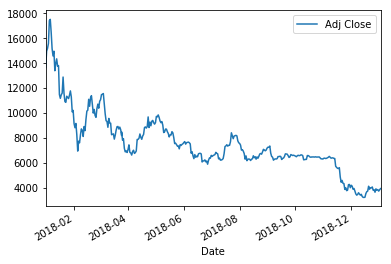

In [ ]:
# Download Data for Spectra Energy Partners, L 
# Cryptocurrencies 
# Bitcoin, Ripple, Ethereum, Litecoin, Binance Coin, Bitcoin Cash, EOS, Tether, Stellar, all in USD
#tckrs = ['BTC-USD','XRP-USD', 'ETH-USD', 'LTC-USD', 'BNB-USD', 'BCH-USD', 'EOS-USD', 'USDT-USD', 'XLM-USD']
tck_data = odata('BTC-USD', datetime(2018, 1, 1),datetime(2019, 1, 1))
clspx = tck_data[['Adj Close']]
clspx.plot()
plt.show()

Para la estrategia de **momentum** debemos usar las medias moviles (moving averages o rolling means) A continuación tenemos el ejemplo de cálculo de estas medias moviles simples. Por ejemplo para calcular una media movil de $N$ días del activo con precios $X_t$ en el tiempo $t$ se usa la fórmula:

$ \displaystyle ma_t^{(N)} = \frac{1}{N} \sum_{k=0}^{N-1} X_{t-k} $

Note que la media movil es nuevamente una serie de tiempo pero más cortita.

En general las medias moviles nos proporcionan una vista general de las tendencias. 

El siguiente ejemplo nos muestra como calcular las medias moviles para $7, 30, 90$ y $120$ días.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

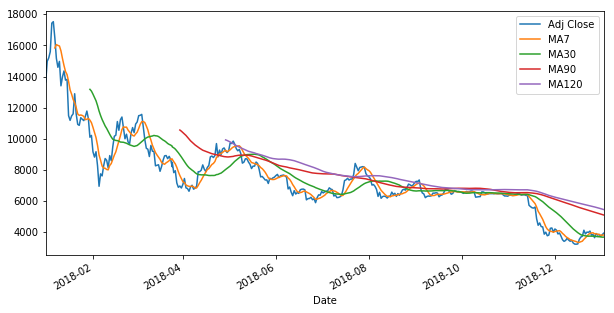

In [ ]:
#####	Calculate the moving averages	################
clspx['MA7'] = clspx['Adj Close'].rolling(window=7).mean()
clspx['MA30'] = clspx['Adj Close'].rolling(window=30).mean()
clspx['MA90'] = clspx['Adj Close'].rolling(window=90).mean()
clspx['MA120'] = clspx['Adj Close'].rolling(window=120).mean()
clspx.plot(figsize=(10, 5))
plt.show()

Note que:
1.   Sí los valores de la media movil están por debajo del precio, esto significa un mercado a la alza y la media movil (en tiempos largos) actua como un piso para el precio del activo 
2.   Sí los valores están por encima del precio, esto representa reciliencia para mantener el precio alto.

Algunos puntos negativos de las medias moviles son: que el pasado no nos dice nada del futuro y la información esta retrasada $\frac{N}{2}$, las ventanas cortas tienen mucho ruido y las grandes son muy suaves para revelar los picos (o saltos) en el precio (aquí es donde esta el dienro a veces)


Para superar algunos de estos problemas a veces se utilizan las medias moviles pesadas exponenciales. Para construirlas primero definimos lo que es una media movil pesada, con pesos $w_i$

$\displaystyle wma_t^{(N)} = \frac{\displaystyle \sum_{k=0}^{N-1}w_kX_{t-k}}{\displaystyle \sum_{k=0}^{N-1}w_k}$

En general la media movil exponencial esá sujeta a la fórmula:

$ Z_t = (1- \alpha) z_{t-1} + \alpha X_t$

y es f\'acil notar que es lo mismo que la media movil pesada pero teniendo los pesos

$\displaystyle w_i = \begin{cases} (1-\alpha)^N & \text{S\'i } i =0 \\ (1-\alpha)^i\alpha & \text{S\'i } i< N \\ \alpha^N& \text{S\'i } i=N \end{cases}$

En $pandas.DataFrame.ewma$ se determina el $\alpha$ de decaimiento en t\'erminos de: La longitud de la ventana $N$ (span), el centro de masa $c$ (com)o la vida media $h$ (halflife), de acuerdo a:

$\displaystyle \alpha = \begin{cases} \frac{2}{N+1} \\ \frac{1}{1+c} \\ 1- e^{\frac{\ln(0.5)}{h}} \end{cases}$

La ventaja de las medias moviles exponenciales es que reaccionan m\'as r\'apidamente a cambios en el precio.

A continuaci\'on un ejemplo de su uso.

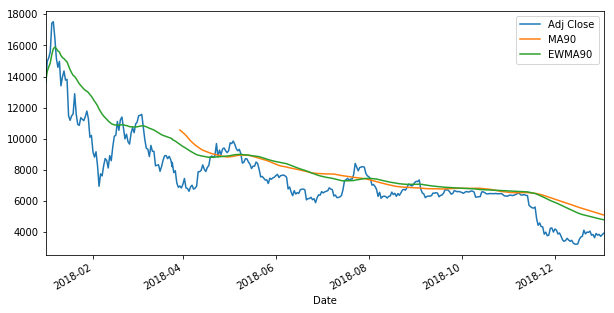

In [ ]:
##### Exponential weighted moving average, alpha with span    ####
clspx['EWMA90'] = clspx['Adj Close'].ewm(ignore_na=False,span=90,min_periods=0,adjust=True).mean()
clspx[['Adj Close','MA90', 'EWMA90']].plot(figsize=(10, 5))
plt.show()

$\Large La \ estrategia \ de \ momentum$

Esta estrategia es muy sencilla y la idea consiste en cambiar la posici\'on siempre que el proceso de precios del activo cruce el proceso de medias moviles.

Empezamos creando series de tiempo para los precios y las medias moviles exponenciales de $90$ d\'ias

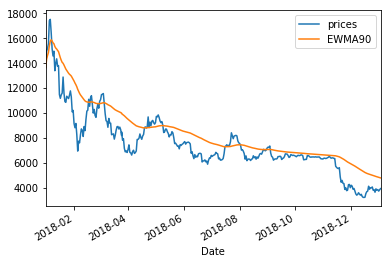

In [ ]:
### Trading strategy with the EWMA90 ###
#First take the sign taking differences of Adj Close with EWMA90
close_px = clspx['Adj Close']
ewma_px = clspx['EWMA90']
close_px.plot(label="prices")
ewma_px.plot(label="EWMA90")
plt.legend()
plt.show()

Sea $p_t$ la serie de precios y $e_t$ la serie $EWMA$ y note que:


1.   S\'i $p_t$ cruza $e_t$ desde abajo, vamos a cerrar las posiciones cortas y vamos a abrir posiciones largas.
2.   S\'i $p_t$ cruza $e_t$ desde arriba, vamos a cerrar las posiciones largas y vamos a abrir posiciones cortas.

Esto en forma de ecuaci\'on se ve:

$ \displaystyle signal_{t+1} =  \begin{cases} 1 & \text{S\'i } p_t > e_t \equiv p_t-e_t > 0 \\ -1 & \text{S\'i } p_t < e_t \equiv p_t-e_t < 0 \end{cases}.$

Note que la señal esta corrida un s\'ia, esto es debido a que los c\'alculos del tiempo $t$ se ven reflejados en en el tiempo $t+1$. Lo que se resume como:

$ \displaystyle signal_{t+1}=  sign(p_t-e_t)$

Esto es:

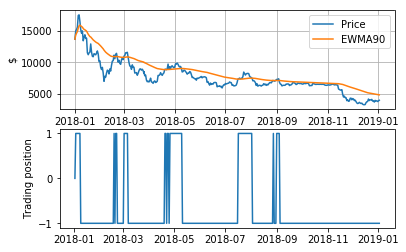

In [ ]:
signal_px = close_px - ewma_px
trade_pos = signal_px.apply(np.sign)
trade_pos = trade_pos.shift(1)
##Plot results
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(close_px.index, close_px, label='Price')
ax.plot(ewma_px.index, ewma_px, label = 'EWMA90')

ax.set_ylabel('$')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(trade_pos.index, trade_pos, label='Trading position')
ax.set_ylabel('Trading position')
plt.show()


Ya tenemos la estrategia, ahora vamos a hacer la prueba del desempeño.

Para esto vamos a calcular los retornos del activo y sencillamente los retornos de la estrategia son los retornos del activo en el periodo por la posici\'on ($1$ para long $-1$ para short)

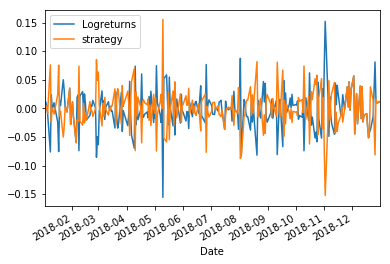

In [ ]:
#@title 1- Código oculto :) doble click para ver!
##Calculate the log returns of asset
log_ret = np.log(close_px).diff()
r_s = trade_pos * log_ret
log_ret.plot(label="Logreturns")
r_s.plot(label="strategy")
plt.legend()
plt.show()

Note que esta estrategia se puede mejorar sencillamente teniendo tres posiciones ($-1$, $0$ y $1$) representando la acci\'on a tomar, sobre el n\'umero de participaciones.

PAra tener una mejor visi\'on  de los retornos, tomaremos los retornos cumulativos de la estrategia y del activo (lo que ser\'ia comparable con la estrategia buy and hold)

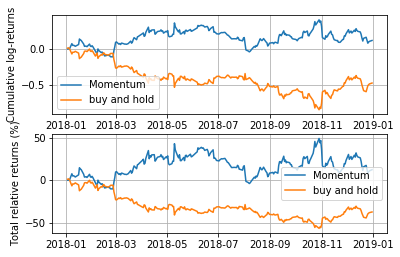

In [ ]:
## Calculate the cumulative log returns
cum_ret = r_s.cumsum()
nost_cum_ret = log_ret.cumsum()
# And relative returns
cum_rel_ret = np.exp(cum_ret) - 1
nost_cum_rel_ret = np.exp(nost_cum_ret) - 1

fig = plt.figure()
ax = fig.add_subplot(2,1,1)

ax.plot(cum_ret.index, cum_ret, label='Momentum')
ax.plot(nost_cum_ret.index, nost_cum_ret, label='buy and hold')

ax.set_ylabel('Cumulative log-returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(cum_rel_ret.index, 100*cum_rel_ret, label='Momentum')
ax.plot(nost_cum_rel_ret.index, 100*nost_cum_rel_ret, label='buy and hold')

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()
plt.show()


In [ ]:
1000000*(1+0.23/12)**60

3124011.754657576